In [1]:
import os
import cv2
import sys
import shutil
import random
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
from scipy.misc import *

# EigenFaces 

In [2]:
# Read the all data
images = []
for f in range(1,41):
    for i in range(1,11):
        path_to_img = ""
        image = cv2.imread(path_to_img,0)
        image_vec = np.array(image, dtype='float64').flatten()
        images.append(image_vec)

In [3]:
def showfig(image):
    imgplot=plt.imshow(image, cmap='gray')
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)
    plt.savefig("output.png")

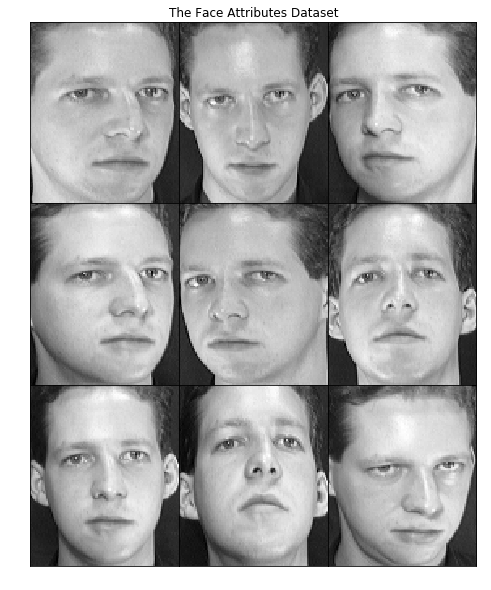

In [4]:
# to get a hang of the data, lets see some part of the dataset images.
fig = plt.figure(figsize=(8,10))
plt.title('The Face Attributes Dataset')
plt.subplots_adjust( wspace=0 ,hspace=0,)
plt.axis('off')
for i in range(1,10):
    fig.add_subplot(3,3,i)
    img=images[i]
    img=img.reshape(112,92)
    showfig(img)

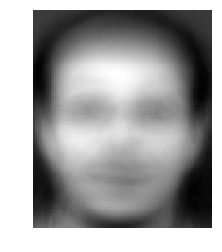

In [7]:
# calculate mean vector and visulize 
mu = np.mean(images,axis=0)
plt.imshow(mu.reshape(112,92), cmap='gray')
plt.axis('off')
plt.savefig("mean.png")

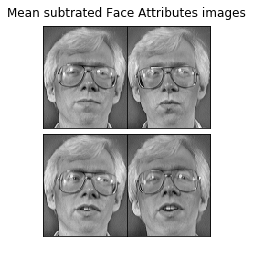

In [9]:
# subtract mean from image vectors and visulize
im = images-mu
fig = plt.figure(figsize=(3,4))
plt.title('Mean subtrated Face Attributes images')
plt.subplots_adjust( wspace=0 ,hspace=0,)
plt.axis('off')
for i in range(1,5):
    fig.add_subplot(2,2,i)
    img=im[i+10]
    img=img.reshape(112,92)
    showfig(img)

In [10]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    U, S, V = np.linalg.svd(X)
    components = V[:n_pc]
    
    return components

In [11]:
components = pca(np.array(images),26)

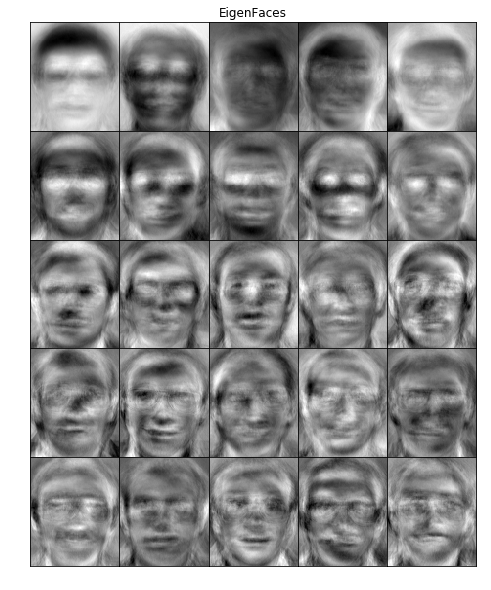

In [13]:
fig = plt.figure(figsize=(8,10))
plt.title('EigenFaces')
plt.subplots_adjust( wspace=0 ,hspace=0,)
plt.axis('off')
for i in range(1,26):
    fig.add_subplot(5,5,i)
    img=components[i]
    img=img.reshape(112,92)
    showfig(img)

In [14]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image

In [25]:
recovered_images=[]
for _ in range(13):
    i = np.random.randint(0, 400)
    recovered_images.append(reconstruction(np.array(images), components, mu, 112, 92, i))
recovered_images=np.array(recovered_images)

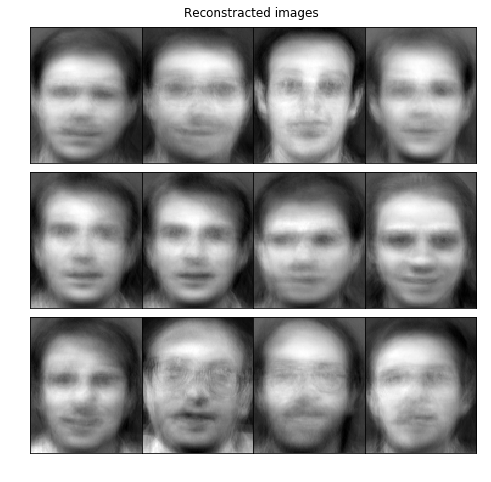

In [26]:

fig = plt.figure(figsize=(8,8))
plt.title('Reconstracted images ')
plt.subplots_adjust(wspace=0 ,hspace=0)
plt.axis('off')
for i in range(1,13):
    fig.add_subplot(3,4,i)
    img=recovered_images[i]
    img=img.reshape(112,92)
    showfig(img)